データ整形

In [1]:
!wget https://nlp100.github.io/data/ai.ja.zip

--2023-05-12 13:55:40--  https://nlp100.github.io/data/ai.ja.zip
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
nlp100.github.io (nlp100.github.io)|185.199.108.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 17516 (17K) [application/zip]
`ai.ja.zip' に保存中

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s 時間 0.001s     

2023-05-12 13:55:40 (13.3 MB/s) - `ai.ja.zip' へ保存完了 [17516/17516]



In [1]:
import zipfile
zip_f =  zipfile.ZipFile('data/ai.ja.zip')
zip_list = zip_f.namelist()
print(zip_list)

['ai.ja.txt', 'readme.ai.ja.md']


In [2]:
with zipfile.ZipFile('data/ai.ja.zip') as myzip:
    myzip.extract('ai.ja.txt', path = './work')

ファイルに入っている文章を一文1行にする

In [13]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00m eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.38.4
    Uninstalling wheel-0.38.4:
      Successfully uninstalled wheel-0.38.4
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.0
    Uninstalling setuptools-67.6.0:
      Successfully uninstalled setuptools-67.6.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 32.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.2/850.2 kB 17.9 MB/s eta 0:00:00m eta 0:00:01
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.7
    Uninstalling thinc-8.1.7:
      Successfully uninstalled thinc-8.1.7
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.0
    Uninstalling spacy-3.5.0:
      Successfully uninstalled spacy-3.5.0
ERROR: pip's d

In [14]:
import spacy
nlp = spacy.load('ja_ginza')
with open('work/ai.ja.txt') as fi,open('work/ai.ja.txt.ginza','w') as fo:
    for line in fi:
        doc = nlp(line.rstrip())
        for sent in doc.sents:#doc.sents で文章のジェネレータ
            fo.write(str(sent) + '\n')

In [15]:
!head work/ai.ja.txt.ginza

人工知能
人工知能（じんこうちのう、、AI〈エーアイ〉）とは、「『計算（）』という概念と『コンピュータ（）』という道具を用いて『知能』を研究する計算機科学（）の一分野」を指す語。
「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピューターに行わせる技術」、または、「計算機（コンピュータ）による知的な情報処理システムの設計や実現に関する研究分野」ともされる。
『日本大百科全書(ニッポニカ)』の解説で、情報工学者・通信工学者の佐藤理史は次のように述べている。
人間の知的能力をコンピュータ上で実現する、様々な技術・ソフトウェア・コンピュータシステム。
応用例は自然言語処理（機械翻訳・かな漢字変換・構文解析等）、専門家の推論・判断を模倣するエキスパートシステム、画像データを解析して特定のパターンを検出・抽出したりする画像認識等がある。
1956年にダートマス会議でジョン・マッカーシーにより命名された。
現在では、記号処理を用いた知能の記述を主体とする情報処理や研究でのアプローチという意味あいでも使われている。
家庭用電気機械器具の制御システムやゲームソフトの思考ルーチンもこう呼ばれることもある。
プログラミング言語 による「」というカウンセラーを模倣したプログラム（人工無脳）がしばしば引き合いに出されるが、計算機に人間の専門家の役割をさせようという「エキスパートシステム」と呼ばれる研究・情報処理システムの実現は、人間が暗黙に持つ常識の記述が問題となり、実用への利用が困難視されている。


In [16]:
import CaboCha
with open('work/ai.ja.txt.ginza') as fi,open('work/ai.ja.txt.parsed','w') as fo:
    c = CaboCha.Parser()#カボチャのparserクラスにアクセス
    for sentence in fi:
        tree = c.parse(sentence)#Parserのメソッドparse()を使って構文木を生成
        result = tree.toString(CaboCha.FORMAT_LATTICE)#構文木Treeのメソッド,toString()に情報の出力方法を指定して呼び出し
        fo.write(result)

#40 係り受け解析結果の読み込み（形態素）

形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [17]:
class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

In [18]:
all_ai_sentences_list = []
ai_sentence_list = []
import re

with open('work/ai.ja.txt.parsed') as fi:
    for line in fi:#一文1行
        line_info = re.split("['\t', ]",line.rstrip())
        #print(line_info)
        if line_info[0] == 'EOS' and len(ai_sentence_list):
            all_ai_sentences_list.append(ai_sentence_list)
            ai_sentence_list = []
        elif line_info[0] == '*':
            continue
        else:
            surface = line_info[0]
            base = line_info[7]
            pos = line_info[1]
            pos1 = line_info[2]
            m = Morph(surface, base, pos, pos1)
            ai_sentence_list.append(m)


#41. 係り受け解析結果の読み込み（文節・係り受け）

40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ

In [1]:
class Morph:
    def __init__(self, surface, base, pos, pos1, chunk):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
        self.chunk = chunk

In [2]:
class Chunk:
    def __init__(self, idx, dst, sentence):
        self.morphs = []
        self.dst = dst
        self.srcs = []
        
        self.sentence = sentence
        self.idx = idx
    
    def surface(self):#　　文節内の形態素の集合を文字列にして出力するメソッド
        chk_word = ""
        for morph in self.morphs:
            if morph.pos != '記号':#記号を排除
                chk_word += morph.surface
        return chk_word
    
    def verb_base(self):#  最左の動詞を返す
        v = []
        if self.has_pos("動詞"):
            for morph in self.morphs:
                 if morph.pos == "動詞":
                        v.append(morph.base)
                        return next(iter(v))
                        
            
    
    def has_dst(self):#　　係り先あるか
        if self.dst != -1:
            return True
        return False

    def to_dst_chunk(self):#　　係り先のchunkの表層形を表示
        return self.sentence[self.dst].surface()
    
    def has_pos(self,pos):#　　chunkが指定した品詞をもっているか確認できる
        for morph in self.morphs:
            if morph.pos == pos:
                return True
        return False
    
    
    def has_pos1(self,pos1):#　　chunkが指定した品詞をもっているか確認できる
        for morph in self.morphs:
            if morph.pos1 == pos1:
                return True
        return False
    
    
    def has_word(self, word, pos):
        for morph in self.morphs:
            if morph.pos == pos and morph.surface == word:
                return True
        return False
   
    
    
    def has_srcs(self):#  係りもととなっているか
        if self.srcs:
            return True
        return False
    
    
    
    def of_particle(self):
        for morph in self.morphs:
            if morph.pos == "助詞":
                return morph.base
    
    def get_particle(self):#  右側から助詞を取得してくる
        particle_list = []
        if self.morphs[-1].pos  == "助詞":
            for m in reversed(self.morphs):
                if m.pos == "助詞":
                    particle_list.append(m.surface)
                else:
                    return ''.join(reversed(particle_list))
                    
               
                    
    
    #　　表示用
    def __str__(self):
        morphs_str = ''.join(m.surface for m in self.morphs)
        return f'文節番号： {self.idx},\t係り先(dst)： {self.dst},\t係り元(srcs): {self.srcs},\tmorphs: {morphs_str}'

In [3]:
import re
all_sentences_list = []
sentence_list = []


with open('work/ai.ja.txt.parsed') as f:
    
    for line in f:#一文1行
        line_info = re.split("[\t, ]",line.rstrip())
        
        if line_info[0] == "*" :# "*"（文節情報の行）来た時
            idx = int(line_info[1])
            dst = int(line_info[2][:-1])#Dを避ける
            chunk = Chunk(idx, dst, sentence_list)
            sentence_list.append(chunk)
            
        elif line_info[0] == "EOS":#文の終端記号
            for chunk in sentence_list:
                sentence_list[chunk.dst].srcs.append(chunk.idx)#srcsに係り元番号の追加
            
            all_sentences_list.append(sentence_list)
            sentence_list = []
            
        else:#形態素がきた場合
            surface = line_info[0]
            base = line_info[7]
            pos = line_info[1]
            pos1 = line_info[2]
            m = Morph(surface, base, pos, pos1, chunk)
            chunk.morphs.append(m)
           

In [4]:
for chunk in all_sentences_list[1]:
    print(chunk)

文節番号： 0,	係り先(dst)： 17,	係り元(srcs): [],	morphs: 人工知能
文節番号： 1,	係り先(dst)： 17,	係り元(srcs): [],	morphs: （じんこうちのう、、
文節番号： 2,	係り先(dst)： 3,	係り元(srcs): [],	morphs: AI
文節番号： 3,	係り先(dst)： 17,	係り元(srcs): [2],	morphs: 〈エーアイ〉）とは、
文節番号： 4,	係り先(dst)： 5,	係り元(srcs): [],	morphs: 「『計算
文節番号： 5,	係り先(dst)： 9,	係り元(srcs): [4],	morphs: （）』という
文節番号： 6,	係り先(dst)： 9,	係り元(srcs): [],	morphs: 概念と
文節番号： 7,	係り先(dst)： 8,	係り元(srcs): [],	morphs: 『コンピュータ
文節番号： 8,	係り先(dst)： 9,	係り元(srcs): [7],	morphs: （）』という
文節番号： 9,	係り先(dst)： 10,	係り元(srcs): [5, 6, 8],	morphs: 道具を
文節番号： 10,	係り先(dst)： 12,	係り元(srcs): [9],	morphs: 用いて
文節番号： 11,	係り先(dst)： 12,	係り元(srcs): [],	morphs: 『知能』を
文節番号： 12,	係り先(dst)： 13,	係り元(srcs): [10, 11],	morphs: 研究する
文節番号： 13,	係り先(dst)： 14,	係り元(srcs): [12],	morphs: 計算機科学
文節番号： 14,	係り先(dst)： 15,	係り元(srcs): [13],	morphs: （）の
文節番号： 15,	係り先(dst)： 16,	係り元(srcs): [14],	morphs: 一分野」を
文節番号： 16,	係り先(dst)： 17,	係り元(srcs): [15],	morphs: 指す
文節番号： 17,	係り先(dst)： -1,	係り元(srcs): [0, 1, 3, 16, 17],	morphs: 語。


#42. 係り元と係り先の文節の表示

係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [5]:
for chunk in all_sentences_list[1]:
    if chunk.has_dst():
        print(f'係り元：{chunk.surface()}\t係り先：{chunk.to_dst_chunk()}')

係り元：人工知能	係り先：語
係り元：じんこうちのう	係り先：語
係り元：AI	係り先：エーアイとは
係り元：エーアイとは	係り先：語
係り元：計算	係り先：という
係り元：という	係り先：道具を
係り元：概念と	係り先：道具を
係り元：コンピュータ	係り先：という
係り元：という	係り先：道具を
係り元：道具を	係り先：用いて
係り元：用いて	係り先：研究する
係り元：知能を	係り先：研究する
係り元：研究する	係り先：計算機科学
係り元：計算機科学	係り先：の
係り元：の	係り先：一分野を
係り元：一分野を	係り先：指す
係り元：指す	係り先：語


#43. 名詞を含む文節が動詞を含む文節に係るものを抽出

名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [6]:
for chunk in all_sentences_list[1]:
    if chunk.has_pos('名詞')and chunk.has_dst:
        if chunk.sentence[chunk.dst].has_pos('動詞'):
            print(f'係り元（名詞）：{chunk.surface()}\t係り先(動詞)：{chunk.to_dst_chunk()}')

係り元（名詞）：道具を	係り先(動詞)：用いて
係り元（名詞）：知能を	係り先(動詞)：研究する
係り元（名詞）：一分野を	係り先(動詞)：指す


#44. 係り受け木の可視化

与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

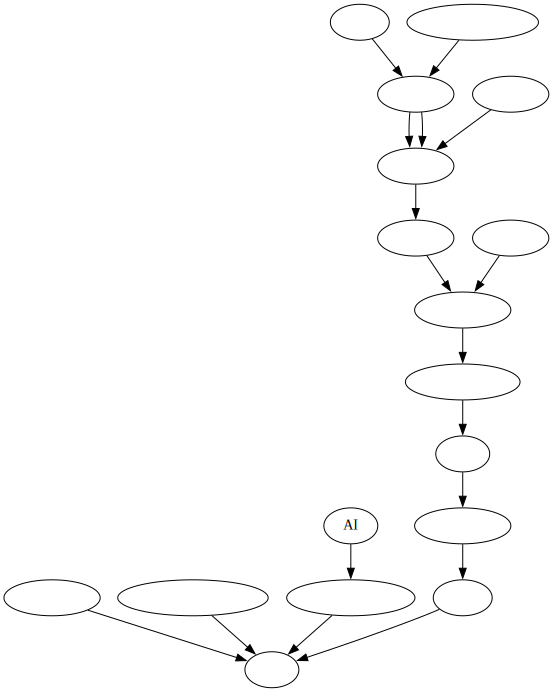

In [7]:
from graphviz import Digraph
graph = Digraph(format="png")
for chunk in all_sentences_list[1]:
    if chunk.has_dst():
        graph.node(chunk.surface())
        graph.node(chunk.to_dst_chunk())
        graph.edge(chunk.surface(), chunk.to_dst_chunk())

display(graph)#表示

#45. 動詞の格パターンの抽出


今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

・動詞を含む文節において，最左の動詞の基本形を述語とする
・述語に係る助詞を格とする
・述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

作り出す	で は を
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

・コーパス中で頻出する述語と格パターンの組み合わせ
・「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）


In [8]:
with open("work/case_corpus.txt", "w") as fo:
    for sent in all_sentences_list:
        for chunk in sent:
            if chunk.has_pos('動詞') and chunk.has_srcs():
                srcs_chunk = []
                for src_num in chunk.srcs:
                    if chunk.sentence[src_num].has_pos("助詞"):
                        srcs_chunk.append(chunk.sentence[src_num].of_particle())
                fo.write(f'{chunk.verb_base()}\t{" ".join(sorted(srcs_chunk))}\n')
                    

In [9]:
with open("work/case_corpus.txt", "w") as fo:
    for sent in all_sentences_list:
        for chunk in sent:
            if chunk.has_pos('動詞') and chunk.has_srcs():
                srcs_chunk = []
                for src_num in chunk.srcs:
                    if chunk.sentence[src_num].morphs[-1].pos == "助詞":
                        srcs_chunk.append(chunk.sentence[src_num].get_particle())
                fo.write(f'{chunk.verb_base()}\t{" ".join(sorted(srcs_chunk))}\n')
                    

In [10]:
!cat work/case_corpus.txt | sort | uniq -c | sort -nr | head -n 10

  59 する	を
  27 する	と
  27 する	が
  18 する	に
  12 する	は を
  11 する	に を
  10 する	で を
  10 よる	に
   9 行う	を
   7 する	が に


In [11]:
!cat work/case_corpus.txt | grep -E '^行う|^なる|^与える' | sort | uniq -c | sort -nr | head

   9 行う	を
   4 なる	に は
   4 なる	が と
   2 行う	に を
   2 なる	に
   1 与える	が などに
   1 与える	に は を
   1 与える	が に
   1 なる	として に は
   1 なる	から が て では と


#46. 動詞の格フレーム情報の抽出

45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

作り出す	で は を	会議で ジョンマッカーシーは 用語を


In [12]:
#　　同順にするためにタプルにしてみる
with open("work/case_corpus.txt", "w") as fo:
    for sent in all_sentences_list:
        for chunk in sent:
            if chunk.has_pos('動詞') and chunk.has_srcs():
                case = []
                for src_num in chunk.srcs:
                    if chunk.sentence[src_num].morphs[-1].pos == "助詞":
                        info = (chunk.sentence[src_num].get_particle(), chunk.sentence[src_num].surface())
                        case.append(info)
                if case:
                    case.sort(key = lambda x: x[0])
                    fo.write(f'{chunk.verb_base()}\t{" ".join([k[0] for k in case])}\t{" ".join([v[1] for v in case])}\n')

In [13]:
!head "work/case_corpus.txt"

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	て に	代わって コンピューターに
する	とも	研究分野とも
述べる	に は	次のように 佐藤理史は
する	で を	コンピュータ上で 知的能力を
する	を	推論判断を
する	を	画像データを


#47. 機能動詞構文のマイニング

動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）
例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

学習を行う	に を	元に 経験を


In [14]:
for sent in all_sentences_list:
    for chunk in sent:
        if chunk.has_pos('動詞'):
            verb = chunk.verb_base()
            case = []
            for src_num in chunk.srcs:
                if len(chunk.sentence[src_num].morphs) >= 2 and chunk.sentence[src_num].morphs[0].pos1 == 'サ変接続' and chunk.sentence[src_num].morphs[1].surface == 'を':
                    #print(chunk.sentence[src_num].surface()+verb)
                    for src_id in chunk.srcs:
                        if src_id == src_num:
                            continue
                        elif chunk.sentence[src_id].morphs[-1].pos == "助詞":
                            info = (chunk.sentence[src_id].get_particle(), chunk.sentence[src_id].surface())
                            case.append(info)
                    if case:
                        case.sort(key = lambda x: x[0])
                        print(f'{chunk.sentence[src_num].surface()+verb}\t{" ".join([k[0] for k in case])}\t{" ".join([v[1] for v in case])}')

記述をする	と	主体と
注目を集める	が	サポートベクターマシンが
経験を行う	に を	元に 学習を
学習を行う	に に を を	元に 元に 学習を 経験を
進化を見せる	において	生成技術において
開発を行う	は	エイダ・ラブレスは
意味をする	に	データに
研究を進める	て	費やして
命令をする	で	機構で
運転をする	に	元に
特許をする	が までに	日本が 2018年までに
運転をする	に	柔軟に
注目を集める	は	ファジィは
研究を続ける	て	向けて
注目を集める	に	急速に
投資を行う	で に	民間企業主導で 全世界的に
探索を行う	で	無報酬で
推論をする	て	経て
投資をする	までに	2022年までに
反乱を起こす	に対して	人間に対して
監視を行う	に まで	人工知能に 歩行者まで
判断を介す	から	観点から
禁止を求める	には	4月には
追及を受ける	で と	整合性で 拒否すると
解任をする	は	Google社員らは
解散をする	が は	倫理委員会が Googleは
話をする	は	哲学者は
議論を行う	で は まで	対談で 須藤は これまで


#48. 名詞から根へのパスの抽出

文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

各文節は（表層形の）形態素列で表現する
パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した


In [15]:
sent = all_sentences_list[33]
conect = []
 
for chunk in sent:
    if chunk.has_pos('名詞') and chunk.dst != -1:
        conect.append(chunk.surface())
        current_c = chunk
        while current_c.dst != -1:
            conect.append(sent[current_c.dst].surface())
            current_c = sent[current_c.dst]
        print("->".join(conect))
        conect =[]
        

ジョンマッカーシーは->作り出した
AIに関する->最初の->会議で->作り出した
最初の->会議で->作り出した
会議で->作り出した
人工知能という->用語を->作り出した
用語を->作り出した


#  49. 名詞間の係り受けパスの抽出

文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がi
とj
（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．

問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
文節iとjに含まれる名詞句はそれぞれ，XとYに置換する
また，係り受けパスの形状は，以下の2通りが考えられる．

文節iから構文木の根に至る経路上に文節jが存在する場合: 
文節iから文節jのパスを表示
上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合:
文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを

In [416]:
#パターンは２つに分かれる
#①[i -> a -> b -> j -> 根] であれば、 [i -> a -> b -> j]
#②[i -> a -> k -> 根]、[j -> b -> k -> 根] であれば、[i -> a | j -> b | k]   i -> aと j -> b　で　k　行き着くというイメージ
#戦略
#とにかくまず名詞を持つ文節を発見→その文節番号のペアを作成（全通り）→ペアの名詞をXとYに置換→そのペアごとに上記の２パターンのうちどれかを実現する
#１の時は片方の分節番号の持つchunkの係先がもう片方の文節番号になるまで処理を続ける
#2の時は

In [418]:
#名詞を含むchunkの名詞部分を特定の文字列に変換する関数

def chunk_surface_change(chunk, post):
    change_word = ''
    for m in chunk.morphs:
        if m.pos != '名詞' and m.pos != '記号':
            change_word += m.surface
            
        elif m.pos == '記号':#記号はスルー　「ジョン・マッカーシー対策」
            continue
            
        else:
            change_word += post
            
    return change_word
                
       

In [419]:
from itertools import combinations
import re

sent = all_sentences_list[33]
nouns = []#名詞を含む文節の文節番号のリスト

for chunk in sent:
    if chunk.has_pos('名詞'):
        nouns.append(chunk.idx)#名詞を含む文節のidx番号を追加

for i, j in combinations(nouns, 2):#名詞を含む文節のペアごとに一個ずつ取り出してパスを作成　しかもイテレータ
    print(i, j)
    i_path = []
    j_path = []
    while i != j:#どのみち係先が根まで行けばi=j
        if i < j:
            i_path.append(i)
            i = chunk.sentence[i].dst
        else:#パターン②用
            j_path.append(j)
            j = chunk.sentence[j].dst
    #print(j_path)
    
    if len(j_path) == 0:#パターン①用
        chunk_x = re.sub('X+', 'X', chunk_surface_change(chunk.sentence[i_path[0]],'X'))#スタートの文節iの名詞部分をXに置き換える
        chunk_y = re.sub('Y+', 'Y', chunk_surface_change(chunk.sentence[i], 'Y'))#ゴールの文節jの名詞部分をXに置き換える
        path_x_y = [chunk_x] + [chunk.sentence[n].surface() for n in i_path[1:]] + [chunk_y]#i_pathに溜め込んだ、jに行き着くまでの文節番号を全て表層化する
        print(f'{"①"}\t{" -> ".join(path_x_y)}')
    
    else:#パターン②用
        chunk_x = re.sub('X+', 'X', chunk_surface_change(chunk.sentence[i_path[0]],'X'))
        chunk_y = re.sub('Y+', 'Y', chunk_surface_change(chunk.sentence[j_path[0]],'Y'))
        
        chunk_k = chunk.sentence[i].surface()#根
        
        path_x = [chunk_x] + [chunk.sentence[n].surface() for n in i_path[1:]]#[i -> a -> k -> 根]
        path_y = [chunk_y] + [chunk.sentence[n].surface() for n in j_path[1:]]#[j -> b -> k -> 根]
        print(f'{"②"}\t{" | ".join([" -> ".join(path_x), " -> ".join(path_y), chunk_k])}')

0 1
②	Xは | Yに関する -> 最初の -> 会議で | 作り出した
0 2
②	Xは | Yの -> 会議で | 作り出した
0 3
②	Xは | Yで | 作り出した
0 4
②	Xは | Yという -> 用語を | 作り出した
0 5
②	Xは | Yを | 作り出した
1 2
①	Xに関する -> Yの
1 3
①	Xに関する -> 最初の -> Yで
1 4
②	Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
1 5
②	Xに関する -> 最初の -> 会議で | Yを | 作り出した
2 3
①	Xの -> Yで
2 4
②	Xの -> 会議で | Yという -> 用語を | 作り出した
2 5
②	Xの -> 会議で | Yを | 作り出した
3 4
②	Xで | Yという -> 用語を | 作り出した
3 5
②	Xで | Yを | 作り出した
4 5
①	Xという -> Yを
